opencv

python使用的opencv是基于c++版的opencv  
```pip install opencv-python```

# opencv的Gui特性 
## 图片操作
+ cv.imread(path,mode):
    + path，不存在时，不会报错，只会在图片显示时输出none
    + mode有三种选项，也可以1，0，-1代替
        + cv2.IMREAD_COLOR : 默认图片载入模式，忽略图片的透明度
        + cv2.IMREAD_GRAYSCALE : 灰度模式载入
        + cv2.IMREAD_UNCHANGED : 按图层模式载入彩图
+ cv.imshow(title,img):
    + title 显示时的标题，同时也是关闭窗口时的参数
    + img 图像对象

+ cv.destroyAllWindows() 关闭窗口
    + cv.destroyWindow('image')，关闭指定的窗口
    
+ cv.namedWindow(title, cv2.WINDOW_NORMAL) 
    + title 将显示的标题
    + cv.WINDOW_NORMAL 设置此参数，窗口出现后可以拖动缩放，默认参数为cv2.WINDOW_AUTOSIZE
+ tips
    + k = cv2.waitKey(0)有时候在64位机出问题，需要更换为 k = cv2.waitKey(0) & 0xFF
    + 当使用cv.read()导入图片时，如果使用matplotlib显示，则存在一些问题，cv为BRG方式载入彩图，matplotlib为RGB，所以matplotlib只会显示灰度图

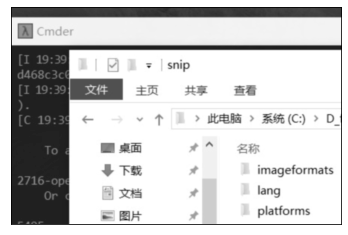

In [22]:
import cv2 as cv
import numpy as np

img = cv.imread("pic/t1.jpg", 0)


def test1():
    cv.imshow('image', img)
    # cv.imshow('image2',img)
    # cv.imshow('image3',img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    # cv.destroyWindow('image')

# 先设置窗口，再显示图片


def test2():
    cv.namedWindow('image', cv.WINDOW_NORMAL)
    cv.imshow('image', img)
    cv.waitKey(0)
    cv.destroyAllWindows()
# 保存


def test3():
    cv.imwrite('pic/messigray.png', img)

# 综合演示


def test4():
    cv.imshow('image', img)
    k = cv.waitKey(0)
    if k == 27:         # wait for ESC key to exit
        cv.destroyAllWindows()
    elif k == ord('s'):  # wait for 's' key to save and exit
        cv.imwrite('pic/messigray.png', img)
        cv.destroyAllWindows()

# 结合matplotlib显示


def test5():
    from matplotlib import pyplot as plt
    plt.imshow(img, cmap='gray', interpolation='bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()


test5()

## 视频操作

+ 获取摄像头设备
    + cv2.VideoCapture(value) #编号0-X，以自身设备摄像头个数取编号,输入字符串则为操作视频文件
    + cap.get(propid) 设置属性0-18代表着不同的属性，3，4代表width和height
    + cap.set(propid,value) 设置相应属性值
    + ret,frame = cap.read() ret为是否读取成功的返回值true/false
        + 判断是否开启，cap.isOpened()/cap.open()
    + gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 设置显示时的灰度属性
+ 视频文件操作，需要先安装ffmpeg或gstreamer，ffmpeg下载放置一个目录然后添加环境变量
+ 保存 
    + fourcc = cv2.VideoWriter_fourcc(*'MJPG') 设置输出视频的编码 或这样设置：cv2.VideoWriter_fourcc('M','J','P','G')
    + out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480)) 写文件的属性
        + 文件名
        + 视频文件编码，根据操作系统不同有所差异，通过设置VideoWriter_fourcc来设置
            + Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. XVID比较合适，MJPG使用于高尺寸视频，X264小尺寸视频
            + Win：DIVX
            + OSX：？？
        + 每秒的帧数
        + (width，height) 画幅尺寸
        + [isColor] : 彩色标志符，为true时，编码器使用彩色模式，否则依旧是灰度模式。
    + flip(frame,mode) mode -1 x轴翻转 1 正常 0 为倒向及左右翻转
    
+ tips  
    cv2.CAP_PROP_POS_MSEC：     视频文件的当前位置（ms）  
    cv2.CAP_PROP_POS_FRAMES：   从0开始索引帧，帧位置。  
    cv2.CAP_PROP_POS_AVI_RATIO：视频文件的相对位置（0表示开始，1表示结束）  
    cv2.CAP_PROP_FRAME_WIDTH：  视频流的帧宽度。  
    cv2.CAP_PROP_FRAME_HEIGHT： 视频流的帧高度。  
    cv2.CAP_PROP_FPS：          帧率  
    cv2.CAP_PROP_FOURCC：       编解码器四字符代码  
    cv2.CAP_PROP_FRAME_COUNT：  视频文件的帧数  
    cv2.CAP_PROP_FORMAT：       retrieve()返回的Mat对象的格式。  
    cv2.CAP_PROP_MODE：         后端专用的值，指示当前捕获模式  
    cv2.CAP_PROP_BRIGHTNESS：图像的亮度，仅适用于支持的相机  
    cv2.CAP_PROP_CONTRAST：  图像对比度，仅适用于相机  
    cv2.CAP_PROP_SATURATION：图像饱和度，仅适用于相机  
    cv2.CAP_PROP_HUE：       图像色调，仅适用于相机  
    cv2.CAP_PROP_GAIN：      图像增益，仅适用于支持的相机  
    cv2.CAP_PROP_EXPOSURE：    曝光，仅适用于支持的相机  
    cv2.CAP_PROP_CONVERT_RGB：布尔标志，指示是否应将图像转换为RGB。  
 

In [31]:
import numpy as np
import cv2

# 获取摄像头对象
def test1():
    cap = cv2.VideoCapture(0)
    print(cap.get(1))
    cap.set(3, 320)
    cap.set(4, 480)
    while(True):
        ret, frame = cap.read()
        # ret 为摄像头对象
        # Our operations on the frame come here
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # 输出判断摄像头对象是否开启
        # print(cap.isOpened())

        cv2.imshow('frame', gray)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # 释放摄像头对象，关闭窗口
    cap.release()
    cv2.destroyAllWindows()

# 操作视频文件
def test2():
    cap = cv2.VideoCapture('pic/noname_man.mp4')

    while(cap.isOpened()):
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame',gray)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    

#保存视频
def test3():
    cap = cv2.VideoCapture(0)
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('pic/output.avi',fourcc, 20.0, (640,480),True)

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            frame = cv2.flip(frame,1)

            out.write(frame)

            cv2.imshow('frame',frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break

    # Release everything if job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()

test3()


## 画板功能
+ 创建画板 img = np.zeros((512,512，3), np.uint8),第一个元组，width，height，

+ cv2.line(img,(x1,y1),(x2,y2),(r,g,b,),px), 最后一位参数设置像素宽度
+ cv2.circle(img,(x,y),r,(r,g,b),mode) , -1实心，>0 空心
+ cv2.rectangle(img,(x1,y1),(x2,y2),(r,g,b,),px), 矩形
+ cv2.ellipse(img,(x,y),(长轴，短轴)，angle，start，end，透明度，mode)，
    + angle为顺时针旋转的角度，
    + start和end代表顺时椭圆有效范围,
    + 透明度0-255 
    + mode -1为实心，>0为空心
+ Polygon 多边形，需要设置顶点
    + cv2.polylines(img,[pts],True,(0,255,255)) 第三个参数为true则是一个实心图形，false则为空的线圈
+ cv2.putText(img,text,(x,y),font,size,(r,b,g),weight,lineType) 添加文字

In [83]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)
cv2.circle(img,(447,63), 80, (0,0,255),0)
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

cv2.ellipse(img,(256,256),(100,50),90,0,180,255,-1)

pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))  #变成一列， 每行里元素为
#print(pts)
cv2.polylines(img,[pts],True,(0,0,255))

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)


cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 画笔操作
+ cv2.setMouseCallback(img_name,callbackfunction)
    + callbackfunction(event,x,y,flags,param)
+ tips:鼠标事件，鼠标事件返回了事件名和坐标
> 'EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP'

+ 

In [102]:
import cv2
import numpy as np
# 查看鼠标事件
def test1():
    events = [i for i in dir(cv2) if "EVENT" in i ]
    print(events)
    
# 双击画园
img = np.zeros((512,512,3), np.uint8)
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
        print(x,y)
# Create a black image, a window and bind the function to window
def test2(): 
    cv2.namedWindow('image')
    cv2.setMouseCallback('image',draw_circle)

    while(1):
        cv2.imshow('image',img)
        if cv2.waitKey(20) & 0xFF == 27:
            break
    cv2.destroyAllWindows()



drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()


## 调色盘

+ cv2.creatTrackbar(name,img_name，defalut，maximum[，callbackfuntion(x,y)]),滑块名，img名
+ cv2.createTrackbar() 
+ tips opencv没有按钮函数，使用滑块来实现

In [109]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
print(img.shape)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

(300, 512, 3)


# 核心操作

## 图片基础操作
### 获取与调整像素值
+ 根据图片的行列获取，BGR图片获得的是B，G，R数组的值，灰度图则是明亮强度
+ img[x,y] 选取ndarray的第x+1个元素内的第y+1元素
+ img.item(x,y,index) 直接取x行y列的0-2的色素bgr值，0 B 1 G 2 R
+ img.itemset((x,y,index),value) 修改指定位置的指定色素值
+ img.shape (width,height,channel),如果图片是灰度图则没有channel
+ img.size 输出图片文件大小
+ img.dtype 图片的数字类型
### 图片选取
+ img[x1:y1,x2:y2] 选取图片的一部分
+ cv2.split(img) 返回(b,g,r),返回的是图层的img
+ img[:,:,index] index：0-2 按图层获取，同样可以按图层赋值
    +  **tips** split比较耗费资源，优先使用np的index功能
### 图片加边框
+ cv2.copyMakeBorder(img,top,bottom,left,right,borderType,value)
    + 四边单位为pix
    + borderType 
        + cv2.BORDER_CONSTANT 实线，此时需要设置value
        + cv2.BORDER_REFLECT 
        + cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT 
        + cv2.BORDER_REPLICATE
        + cv2.BORDER_WRAP 
    +  value 只用来给cv2.BORDER_CONSTANT设置值

In [153]:
import cv2
import numpy
img = cv2.imread('pic/t1.jpg',1)
print(type(img))
px = img[100,100]
print(px)
print(img[100][90:110])
print(img.item(100,100,1))
#cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(img.shape)
print(img.size)

cv2.imshow('im',img[50:150,20:200])
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('kl',cv2.split(img)[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'numpy.ndarray'>
[176 103   0]
[[179 101   0]
 [179 101   0]
 [179 101   0]
 [179 101   0]
 [179 101   0]
 [177 101   1]
 [174 100   4]
 [174 100   6]
 [181 100   3]
 [181 100   1]
 [176 103   0]
 [172 104   0]
 [170 101   4]
 [172 100   6]
 [181  98   6]
 [181  99   4]
 [170 102   3]
 [170 102   3]
 [181  98   6]
 [185  99   3]]
103
(288, 438, 3)
378432


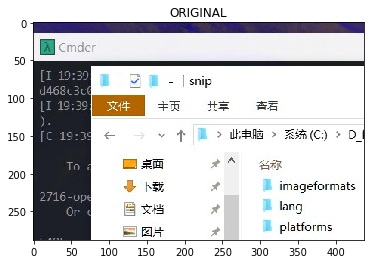

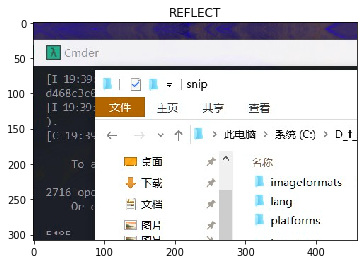

In [165]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('pic/t1.jpg')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

#plt.subplot(231),
plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.show()
# plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
# plt.subplot(233),
plt.imshow(reflect,'gray'),plt.title('REFLECT')
# plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
# plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
#plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

In [2]:
import requests

url = r'http://blog.csdn.net/lishigui'
resp = requests.get(url)
text = resp.text

In [3]:
print(text)

<!DOCTYPE html>
<html lang="zh-CN">
<head>
    <meta charset="UTF-8">
    <link rel="canonical" href="https://blog.csdn.net/lishigui"/>
    <meta http-equiv="content-type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit"/>
    <meta name="force-rendering" content="webkit"/>
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/>
    <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">
    <meta name="referrer" content="always">
    <meta http-equiv="Cache-Control" content="no-siteapp" /><link rel="alternate" media="handheld" href="#" />
    <meta name="shenma-site-verification" content="5a59773ab8077d4a62bf469ab966a63b_1497598848">
        <meta name="csdn-baidu-search"  content='{"autorun":true,"install":true,"keyword":"【热爱生活，挚爱JAVA】我有三愿望：一要认真工作 二要找个爱我的人 三要让我身边的人幸福，特别是我的父母。"}'>
    
    <link href="h

In [5]:
print(resp.encoding)
#x = text.split("charset=", 2)[1]
#x = x.split('"')[1]

from html.parser import HTMLParser
print(resp.status_code)

UTF-8
200
